# MONAN_POST

Neste notebook é apresentado um exemplo de como converter arquivos binários georeferenciados que podem ser abertos com o GrADS para o formato Zarr. Os arquivos binário são abertos por meio dos seus arquivos descritores CTL utilizando o `xgrads`. Os arquivos Zarr são utilizados como fontes de dados de um catáogo carregado com o `intake`.

**Nota:** o notebook [`03-intake_catalog.ipynb`](03-intake_catalog.ipynb) apresenta a utilização da biblioteca `intake` para o acesso remoto destes dados por meio de um catálogo. Veja o script `create_catalog.sh` para a criação do arquivo de catálogo.

Nas células a seguir, observe que a instrução `%%time` é utilizada para contabilizar o tempo de execução do comando.

In [1]:
# Para uso no Google Colab, descomente as linhas a seguir:
#!pip install zarr
#!pip install xgrads

import os
import zarr
import numpy as np
import xarray as xr
from xgrads import open_CtlDataset

In [2]:
# Listas de atributos (experimentos e estatísticas) utilizados no loop para a escrita dos arquivos
# Para reduzir o tempo de execução deste notebook, alguns atributos foram removidos das listas

Exps = ['BAMH']
Stats = ['VIES', 'RMSE']

data = '20230216002023030300'

burl = '../data'

In [3]:
%%time

# Escrita convencional, formato zarr (1 arquivo por vez)
# No loop, observe que o nome dos arquivos CTL é formato e eles são abertos e escritos no formato zarr

compressor = zarr.Blosc(cname="zstd", clevel=3, shuffle=2)
encoding = {
    'zgeo250': {"compressor": compressor},
    'pslc000': {"compressor": compressor},
    'uvel500': {"compressor": compressor},
    'umes500': {"compressor": compressor},
    'zgeo500': {"compressor": compressor},
    'vvel500': {"compressor": compressor},
    'vtmp850': {"compressor": compressor},
    'uvel850': {"compressor": compressor},
    'vvel850': {"compressor": compressor},
    'temp850': {"compressor": compressor},
    'temp250': {"compressor": compressor},
    'umes925': {"compressor": compressor},
    'vtmp925': {"compressor": compressor},
    'temp500': {"compressor": compressor},
    'vtmp500': {"compressor": compressor},
    'umes850': {"compressor": compressor},
    'uvel250': {"compressor": compressor},
    'vvel250': {"compressor": compressor},
    'zgeo850': {"compressor": compressor},
}

for exp in Exps:
    for stat in Stats:
        print(exp, stat)
        filein = str(stat) + str(exp) + '_' + str(data) + 'F.ctl'
        fnamein = os.path.join(burl, filein)
        fnameout = str(stat) + str(exp) + '_' + str(data) + 'F.zarr'
        dset = open_CtlDataset(fnamein).to_zarr(fnameout, mode='w', consolidated=True, encoding=encoding)

BAMH VIES
BAMH RMSE
CPU times: user 7.33 s, sys: 933 ms, total: 8.26 s
Wall time: 1.4 s


In [4]:
# Criação de uma estrutura de dados georeferenciada a partir do arquivo zarr criado

ds = xr.open_zarr('VIESBAMH_20230216002023030300F.zarr')
#ou
#ds = xr.open_dataset('VIESBAMH_20230216002023030300F.zarr', engine='zarr', chunks='auto')

In [5]:
# Verificação da estutura de dados criada

ds

<xarray.Dataset>
Dimensions:  (lat: 401, lon: 901, time: 12)
Coordinates:
  * lat      (lat) float32 -80.0 -79.6 -79.2 -78.8 -78.4 ... 78.8 79.2 79.6 80.0
  * lon      (lon) float32 0.0 0.4 0.8 1.2 1.6 ... 358.4 358.8 359.2 359.6 360.0
  * time     (time) datetime64[ns] 2023-02-16 2023-02-17 ... 2023-02-27
Data variables: (12/19)
    pslc000  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    temp250  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    temp500  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    temp850  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    umes500  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    umes850  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    ...       ...
    vvel250  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    vvel500  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    vvel850  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    zgeo250  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    zgeo500  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
    zgeo850  (time, lat, lon) float32 dask.array<chunksize=(1, 401, 901), meta=np.ndarray>
Attributes:
    comment:  virtual temperatura @ 925 hpa [k]
    pdef:     None
    storage:  99
    title:    
    undef:    -999.9

CPU times: user 57.5 ms, sys: 15.2 ms, total: 72.7 ms
Wall time: 74.2 ms


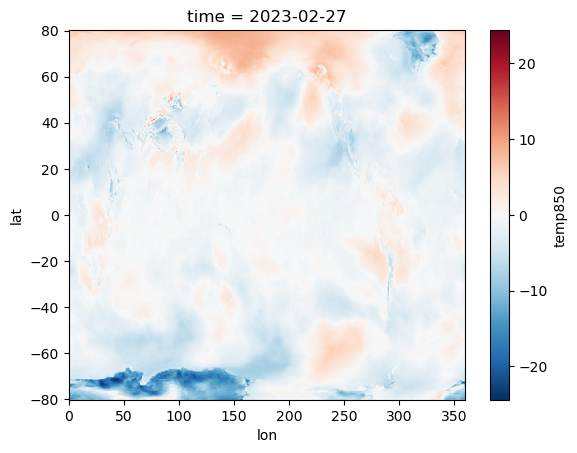

In [6]:
%%time

# Plotagem da variável 'temp850' no último tempo do dataset (estrutura de dados armazenada no objeto ds)

ds['temp850'].isel(time=-1).plot()